<a href="https://colab.research.google.com/github/harshath2000/Intro_to_ML_Assignment_1/blob/main/Asignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/HW1.csv'
data = pd.read_csv(file_path)

# Extracting the explanatory variables and dependent variable
X1 = data['X1'].values
X2 = data['X2'].values
X3 = data['X3'].values
Y = data['Y'].values

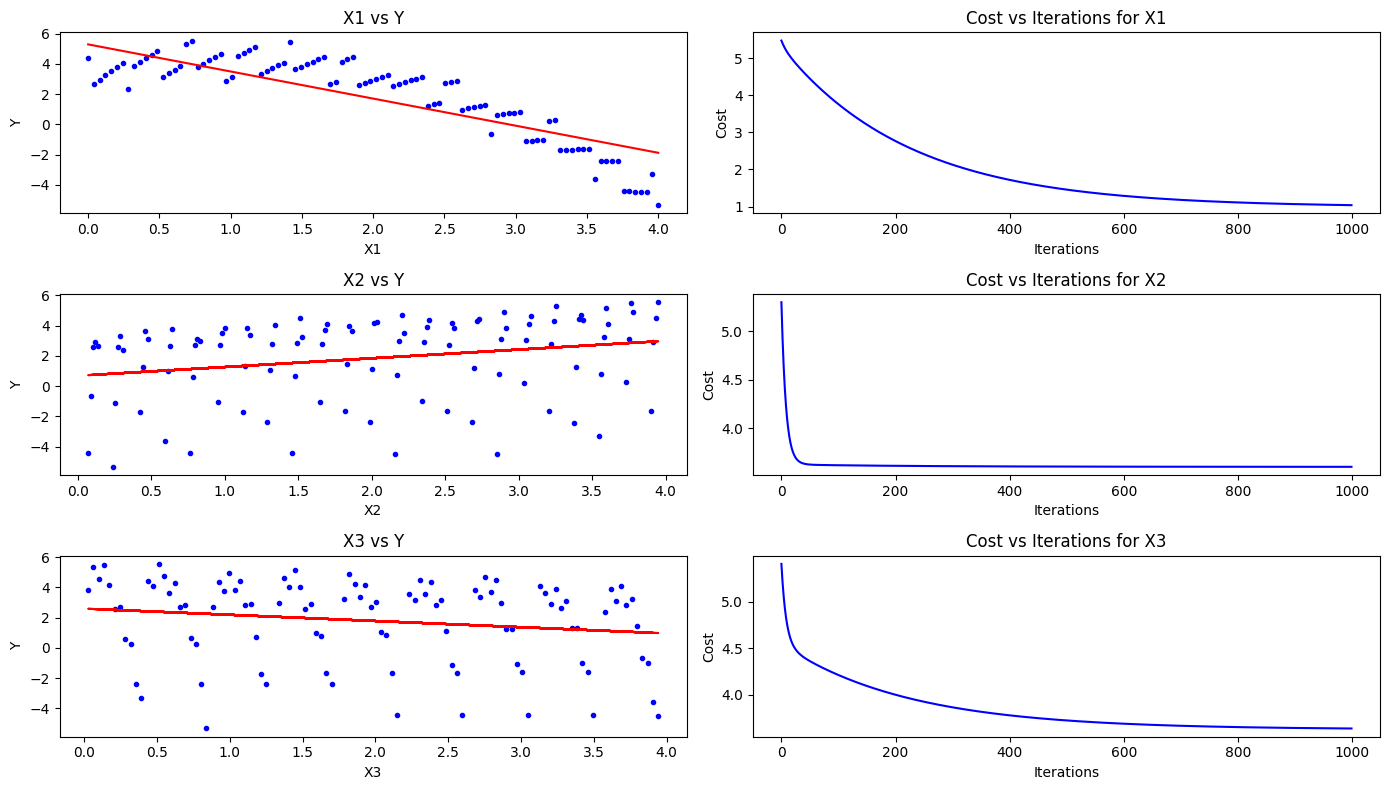

Linear model for X1: Y = 5.2929472827573 + -1.7911907900332469 * X1
Linear model for X2: Y = 0.687019946445204 + 0.5766946227869244 * X2
Linear model for X3: Y = 2.5911866396661667 + -0.4096513504177302 * X3
Final cost for X1: 1.0364360799429273
Final cost for X2: 3.5996728289711006
Final cost for X3: 3.6396602056308045


In [ ]:
# Define the cost function
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    errors = predictions - Y
    cost = (1 / (2 * m)) * np.dot(errors.T, errors)
    return cost

# Gradient Descent algorithm
def gradient_descent(X, Y, theta, alpha, num_iterations):
    m = len(Y)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - Y
        theta -= (alpha / m) * X.T.dot(errors)
        cost_history[i] = compute_cost(X, Y, theta)

    return theta, cost_history

# Preparing data for gradient descent
def prepare_data(X):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
    return X_b

# Training the model for each explanatory variable
learning_rate = 0.01
num_iterations = 1000

# For X1
X1_b = prepare_data(X1)
theta1 = np.zeros(2)
theta1, cost_history1 = gradient_descent(X1_b, Y, theta1, learning_rate, num_iterations)

# For X2
X2_b = prepare_data(X2)
theta2 = np.zeros(2)
theta2, cost_history2 = gradient_descent(X2_b, Y, theta2, learning_rate, num_iterations)

# For X3
X3_b = prepare_data(X3)
theta3 = np.zeros(2)
theta3, cost_history3 = gradient_descent(X3_b, Y, theta3, learning_rate, num_iterations)

# Plotting the results
plt.figure(figsize=(14, 8))

# X1 results
plt.subplot(3, 2, 1)
plt.plot(X1, Y, 'b.')
plt.plot(X1, X1_b.dot(theta1), 'r-')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('X1 vs Y')

plt.subplot(3, 2, 2)
plt.plot(range(num_iterations), cost_history1, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for X1')

# X2 results
plt.subplot(3, 2, 3)
plt.plot(X2, Y, 'b.')
plt.plot(X2, X2_b.dot(theta2), 'r-')
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('X2 vs Y')

plt.subplot(3, 2, 4)
plt.plot(range(num_iterations), cost_history2, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for X2')

# X3 results
plt.subplot(3, 2, 5)
plt.plot(X3, Y, 'b.')
plt.plot(X3, X3_b.dot(theta3), 'r-')
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('X3 vs Y')

plt.subplot(3, 2, 6)
plt.plot(range(num_iterations), cost_history3, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for X3')

plt.tight_layout()
plt.show()

# Reporting the final linear models
print(f'Linear model for X1: Y = {theta1[0]} + {theta1[1]} * X1')
print(f'Linear model for X2: Y = {theta2[0]} + {theta2[1]} * X2')
print(f'Linear model for X3: Y = {theta3[0]} + {theta3[1]} * X3')

# Reporting the final costs
cost_X1 = compute_cost(X1_b, Y, theta1)
cost_X2 = compute_cost(X2_b, Y, theta2)
cost_X3 = compute_cost(X3_b, Y, theta3)

print(f'Final cost for X1: {cost_X1}')
print(f'Final cost for X2: {cost_X2}')
print(f'Final cost for X3: {cost_X3}')

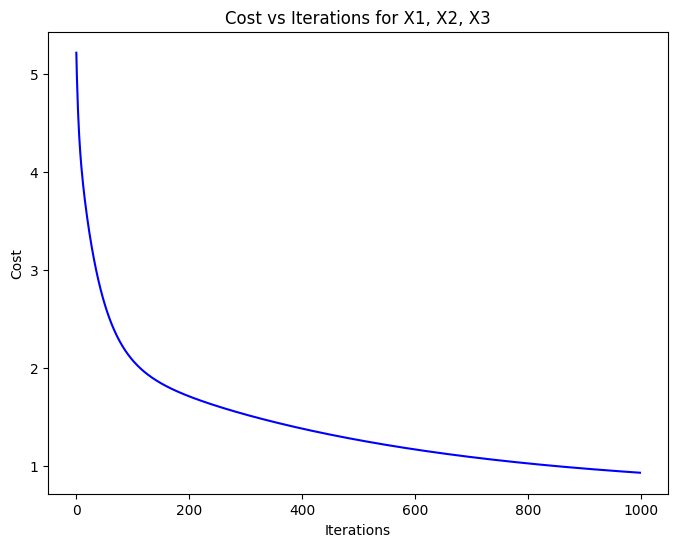

Linear model: Y = 3.3992970512676273 + -1.7332058216404478 * X1 + 0.8489827451594734 * X2 + 0.015073697283572511 * X3
Final cost: 0.9337836009440804
Predictions for new data points:
For X1=1, X2=1, X3=1: Y = 2.530147672070225
For X1=2, X2=0, X3=4: Y = -0.0068198028789780984
For X1=3, X2=2, X3=1: Y = -0.08728122605119726


In [ ]:
# Define the cost function
def compute_cost_multi(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    errors = predictions - Y
    cost = (1 / (2 * m)) * np.dot(errors.T, errors)
    return cost

# Gradient Descent algorithm for multiple variables
def gradient_descent_multi(X, Y, theta, alpha, num_iterations):
    m = len(Y)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - Y
        theta -= (alpha / m) * X.T.dot(errors)
        cost_history[i] = compute_cost_multi(X, Y, theta)

    return theta, cost_history

# Preparing data for gradient descent with all explanatory variables
X_b = np.c_[np.ones((len(X1), 1)), X1, X2, X3]
theta = np.zeros(4)
learning_rate = 0.01
num_iterations = 1000

# Training the model using all three variables
theta, cost_history = gradient_descent_multi(X_b, Y, theta, learning_rate, num_iterations)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), cost_history, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for X1, X2, X3')
plt.show()

# Reporting the final linear model
print(f'Linear model: Y = {theta[0]} + {theta[1]} * X1 + {theta[2]} * X2 + {theta[3]} * X3')

# Reporting the final cost
final_cost = compute_cost_multi(X_b, Y, theta)
print(f'Final cost: {final_cost}')

# Predicting values for new data points
new_data_points = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_data_points_b = np.c_[np.ones((len(new_data_points), 1)), new_data_points]
predictions = new_data_points_b.dot(theta)

print('Predictions for new data points:')
for i, point in enumerate(new_data_points):
    print(f'For X1={point[0]}, X2={point[1]}, X3={point[2]}: Y = {predictions[i]}')